# EDA: Intentional Homicide Victims (Group 10)

Expanded notebook — includes narrative answers to 8 preliminary questions.

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
out = Path('..') / 'outputs'
df = pd.read_csv(out / 'homicide_clean.csv')
rates = pd.read_csv(out / 'homicide_rates.csv')
# Ensure numeric types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
rates['Year'] = pd.to_numeric(rates['Year'], errors='coerce')
rates['rate_per_100k'] = pd.to_numeric(rates['rate_per_100k'], errors='coerce')
print('Loaded cleaned data and rates. Rows:', len(df), ' | rate rows:', len(rates))

Loaded cleaned data and rates. Rows: 118397  | rate rows: 4537


## Which countries have the highest and lowest homicide rates (per 100k) in the most recent year?

Highest homicide rates per 100k in 2023:


,Country,rate_per_100k
0,Jamaica,51.035518
1,Ecuador,45.977112
2,Haiti,41.505428
3,Honduras,31.737809
4,Mexico,24.878156
5,Costa Rica,18.093056
6,Bermuda,15.738618
7,Puerto Rico,14.993912
8,Mongolia,6.001331
9,United States of America,5.879275



Lowest homicide rates per 100k (non-missing) in 2023:


,Country,rate_per_100k
0,Oman,0.141380
1,Singapore,0.189096
2,Slovenia,0.592629
3,Switzerland,0.603026
4,Malta,0.644580
5,Ireland,0.652918
6,"China, Macao Special Administrative Region",0.671817
7,Spain,0.686050
8,Netherlands (Kingdom of the),0.703083
9,Norway,0.737821


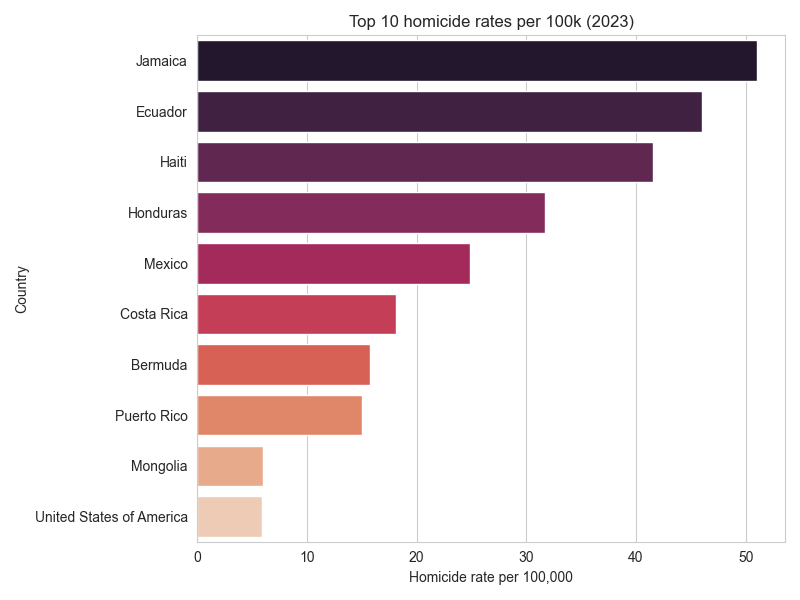

In [2]:
from IPython.display import Image, display
# Top/bottom by rate in most recent year
latest = int(rates['Year'].max())
rt_recent = rates[rates['Year'] == latest].dropna(subset=['rate_per_100k'])
top10 = rt_recent.sort_values('rate_per_100k', ascending=False).head(10)
bottom10 = rt_recent.sort_values('rate_per_100k', ascending=True).head(10)
print(f'Highest homicide rates per 100k in {latest}:')
display(top10[['Country','rate_per_100k']].reset_index(drop=True))
print('\nLowest homicide rates per 100k (non-missing) in {0}:'.format(latest))
display(bottom10[['Country','rate_per_100k']].reset_index(drop=True))
# show saved image if present
img = out / 'top10_rates.png'
if img.exists():
    display(Image(str(img)))

## How has the global homicide count changed over time?

,Year,VALUE
24,2014,2.823311e+06
25,2015,2.923076e+06
26,2016,3.219863e+06
27,2017,3.168108e+06
28,2018,3.173801e+06
29,2019,3.137494e+06
30,2020,3.201392e+06
31,2021,3.154233e+06
32,2022,2.911827e+06
33,2023,4.736238e+05


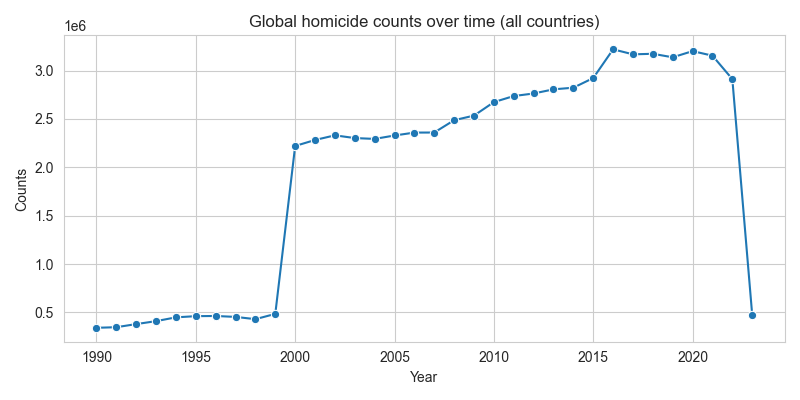

In [3]:
from IPython.display import Image, display
# Global homicide counts over time
world_trend = df.groupby('Year', as_index=False)['VALUE'].sum().sort_values('Year')
display(world_trend.tail(10))
img = out / 'global_trend_counts.png'
if img.exists():
    display(Image(str(img)))

## How do homicide counts compare across major regions?

,Region,VALUE
1,Americas,428394.906464
2,Asia,18815.143276
3,Europe,17065.329192
0,Africa,8424.711092
4,Oceania,923.684028


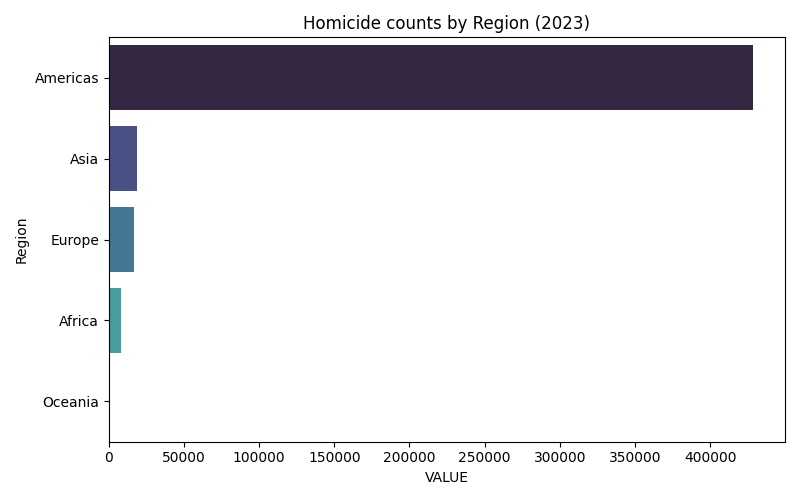

In [4]:
from IPython.display import Image, display
# Regional comparison (most recent year)
recent_counts = df[df['Year'] == int(df['Year'].max())]
region_tot = recent_counts.groupby('Region', as_index=False)['VALUE'].sum().sort_values('VALUE', ascending=False)
display(region_tot)
img = out / 'region_counts.png'
if img.exists():
    display(Image(str(img)))

## How concentrated are global counts?

Top 10 countries account for 95.2% of counts in 2023


,Country,VALUE
27,Mexico,186788.550340
48,United States of America,126573.851260
12,Ecuador,65895.454970
19,Honduras,26772.674226
35,Pakistan,10733.334871
17,Haiti,9702.098170
22,Jamaica,8735.722937
15,France,5769.099306
47,Türkiye,5643.687790
1,Algeria,4283.187081


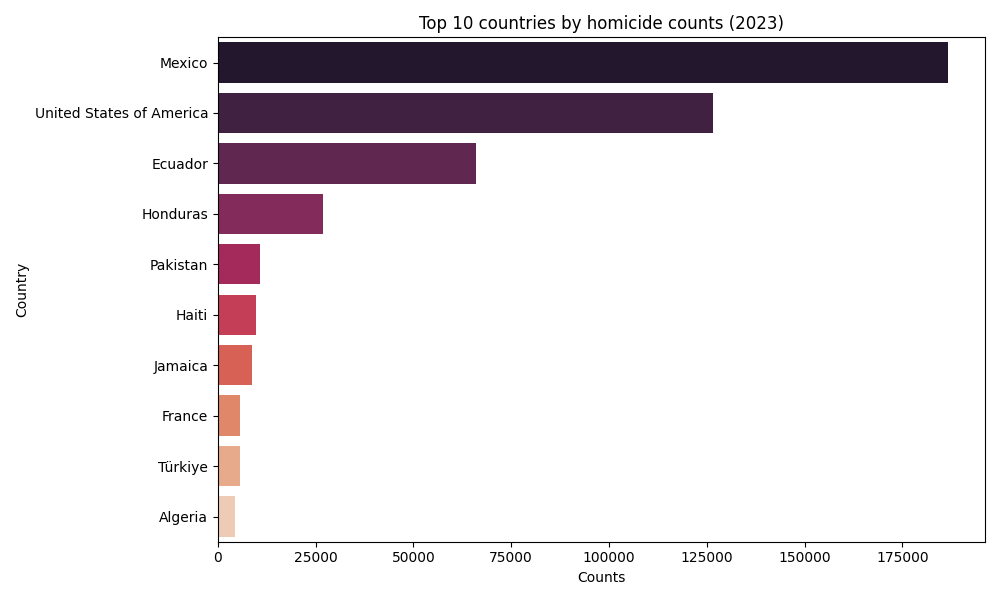

In [5]:
from IPython.display import Image, display
# Concentration: share of top 10 countries by counts in the most recent year
latest = int(df['Year'].max())
recent = df[df['Year'] == latest]
top10_counts = recent.groupby('Country', as_index=False)['VALUE'].sum().sort_values('VALUE', ascending=False).head(10)
total_latest = recent['VALUE'].sum()
share_top10 = 100 * top10_counts['VALUE'].sum() / total_latest if total_latest>0 else 0
print(f'Top 10 countries account for {share_top10:.1f}% of counts in {latest}')
display(top10_counts)
# If a saved plot exists for top10 counts, display it
img = out / 'top10_countries.png'
if img.exists():
    display(Image(str(img)))

## Distribution by mechanism (where available)

In [6]:
from IPython.display import Image, display
# Mechanism distribution (if available)
mech_file = out / 'mechanism_distribution.csv'
if mech_file.exists():
    mech = pd.read_csv(mech_file)
    display(mech.head(10))
else:
    print('Mechanism distribution file not available; the dataset may not include consistent mechanism labels.')

,Dimension,VALUE
0,Total,169936.214847
1,by relationship to perpetrator,150179.827192
2,by mechanisms,122956.087401
3,by situational context,30551.644612


## Is there a significant difference by sex?

,Sex,VALUE
2,Total,303776.368360
1,Male,142534.814126
0,Female,27312.591565


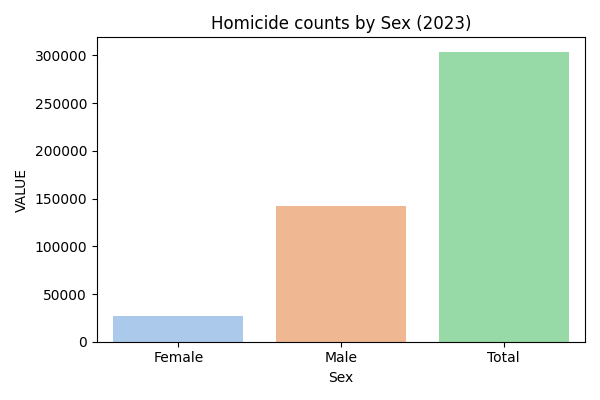

In [7]:
from IPython.display import Image, display
# Sex differences (most recent year)
latest = int(df['Year'].max())
recent = df[df['Year'] == latest]
sex_comp = recent.groupby('Sex', as_index=False)['VALUE'].sum().sort_values('VALUE', ascending=False)
display(sex_comp)
img = out / 'sex_counts.png'
if img.exists():
    display(Image(str(img)))

## Which age group has the highest victims?

In [8]:
from IPython.display import Image, display
# Age groups (most recent year)
latest = int(df['Year'].max())
recent = df[df['Year'] == latest]
age_group = recent.groupby('Age', as_index=False)['VALUE'].sum().sort_values('VALUE', ascending=False)
display(age_group.head(10))

,Age,VALUE
0,Total,473623.774051


## Distribution and outliers

Observations: 118397
99th percentile = 7403.20; number of observations above = 1184


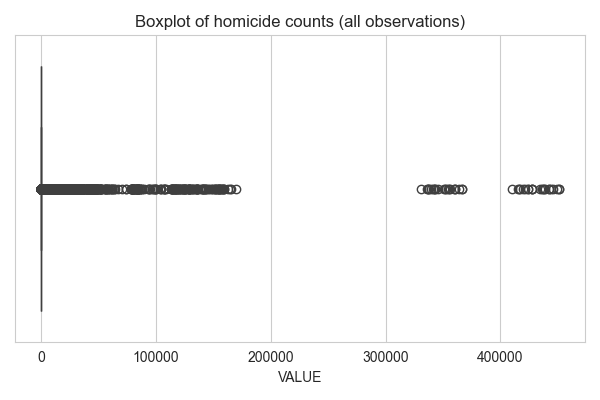

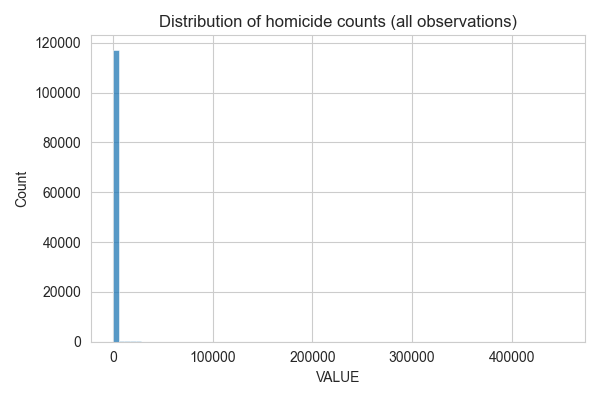

In [9]:
from IPython.display import Image, display
# Distribution and outliers
vals = df['VALUE'].dropna()
print('Observations:', len(vals))
p99 = vals.quantile(0.99)
outliers = vals[vals > p99]
print(f'99th percentile = {p99:.2f}; number of observations above = {len(outliers)}')
# display saved plots if available
img1 = out / 'value_boxplot.png'
img2 = out / 'value_hist.png'
if img1.exists():
    display(Image(str(img1)))
if img2.exists():
    display(Image(str(img2)))